In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.concat([pd.read_csv('all_data_0.csv'), pd.read_csv('all_data_1.csv')], ignore_index=True)
# Show first 10 rows
df.head(10)

,species,path,park,bbox,datetime
0,others,mayo 2023/IAcitizens_tagged/Fotos roedores/lir...,snieves,none,28122012 145028
1,others,mayo 2023/IAcitizens_tagged/Fotos roedores/lir...,snieves,none,05072022 183858
2,others,mayo 2023/IAcitizens_tagged/Fotos roedores/lir...,snieves,none,07072022 113706
3,others,mayo 2023/IAcitizens_tagged/Fotos roedores/lir...,snieves,none,07072022 113710
4,others,mayo 2023/IAcitizens_tagged/Fotos roedores/lir...,snieves,none,07072022 113713
5,others,mayo 2023/IAcitizens_tagged/Fotos roedores/lir...,snieves,none,07072022 113818
6,others,mayo 2023/IAcitizens_tagged/Fotos roedores/lir...,snieves,none,NaN
7,others,mayo 2023/IAcitizens_tagged/Fotos roedores/lir...,snieves,none,NaN
8,others,mayo 2023/IAcitizens_tagged/Fotos roedores/lir...,snieves,none,NaN
9,mus,mayo 2023/IAcitizens_tagged/Fotos roedores/mus...,snieves,none,14102011 113647


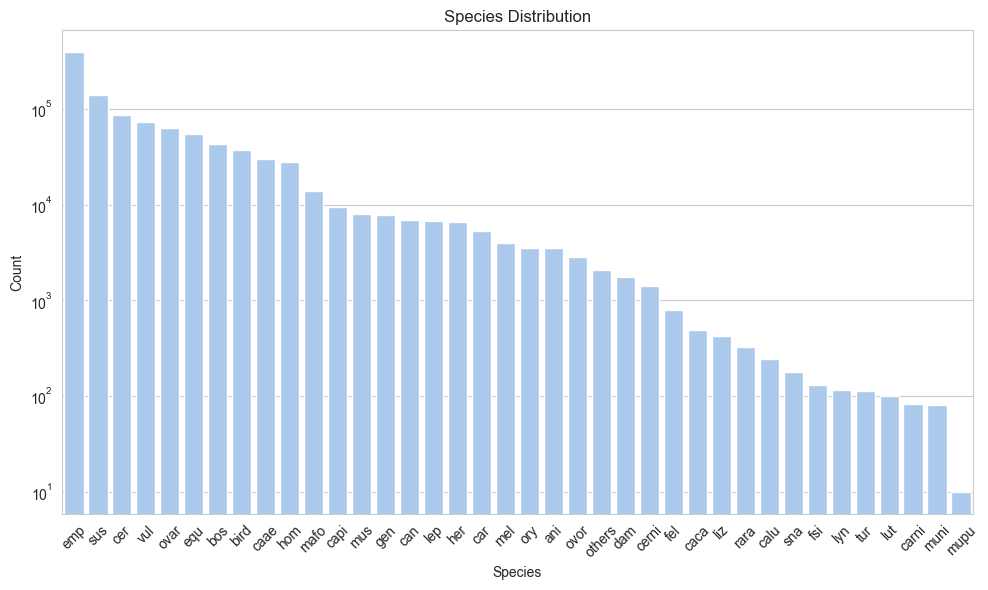

In [ ]:
# graph of species distribution (logaritmic scale)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='species', order=df['species'].value_counts().index)
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

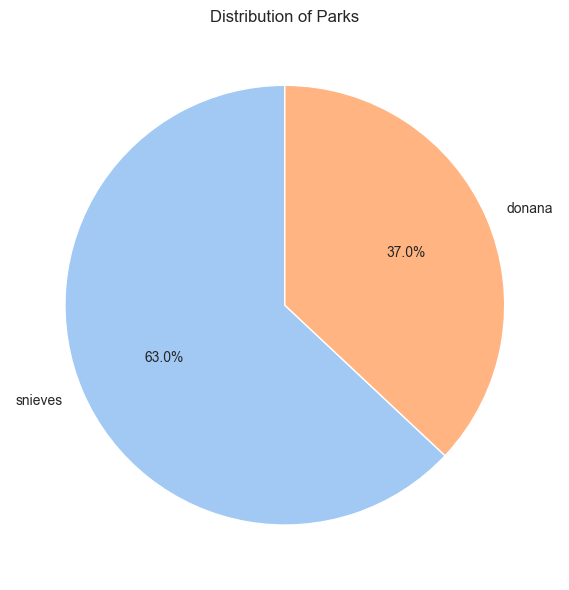

In [7]:
# graph of distribution of parks (pie chart)
plt.figure(figsize=(10, 6))
df['park'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Parks')
plt.ylabel('')
plt.tight_layout()
plt.show()

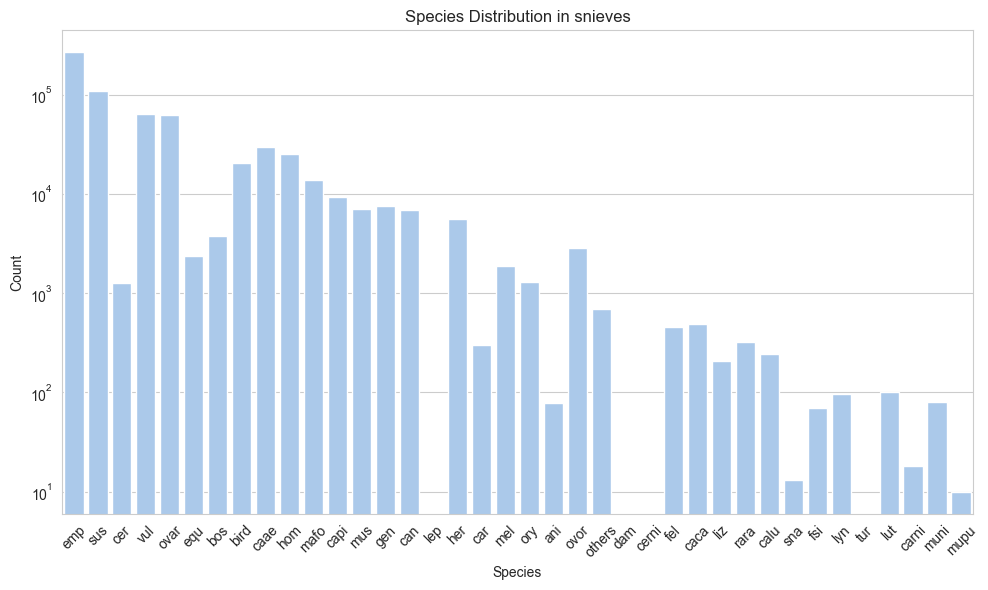

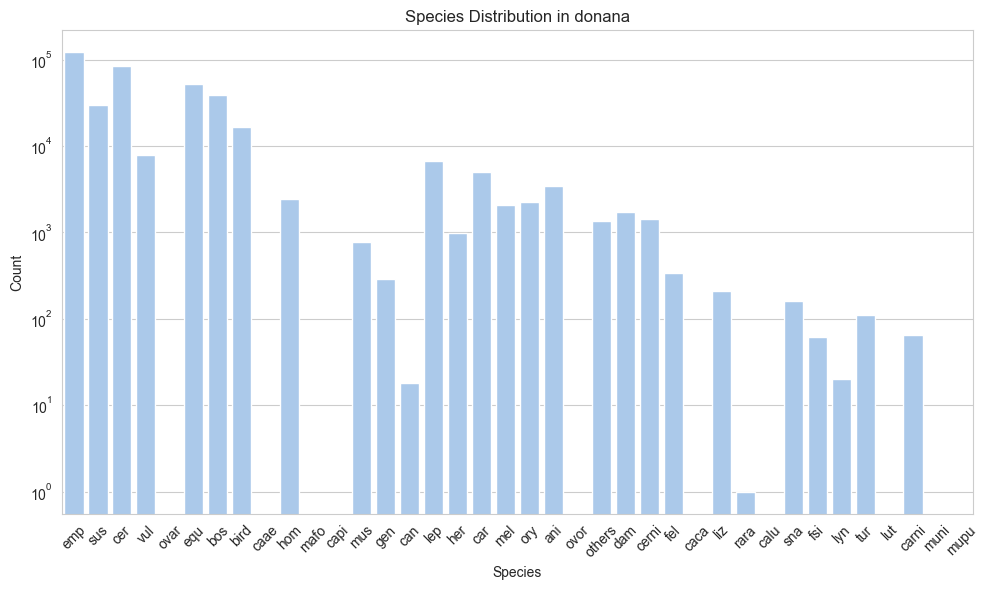

In [9]:
# log bar chart of distribution of species in each park
def plot_species_distribution_by_park(df, park_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df[df['park'] == park_name], x='species', order=df['species'].value_counts().index)
    plt.title(f'Species Distribution in {park_name}')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
# List of parks
parks = df['park'].unique()
# Plot species distribution for each park
for park in parks:
    plot_species_distribution_by_park(df, park)

/var/folders/sn/0vhzn2m114d65_fnmn5fhzxc0000gn/T/ipykernel_78546/2012292191.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')


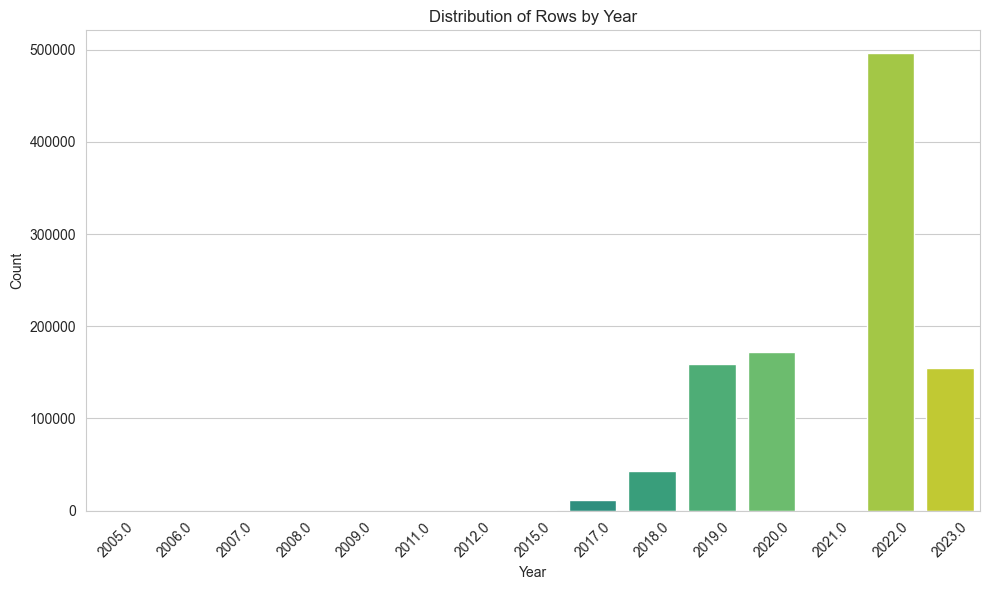

In [11]:
# bar chart of distribution of rows by year
plt.figure(figsize=(10, 6))
# datetime column has DDMMYYYY HHmmSS format
df['year'] = pd.to_datetime(df['datetime'], format='%d%m%Y %H%M%S').dt.year
# count the number of rows for each year
year_counts = df['year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Distribution of Rows by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/sn/0vhzn2m114d65_fnmn5fhzxc0000gn/T/ipykernel_78546/1279013411.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_counts.index, y=time_counts.values, palette='viridis')


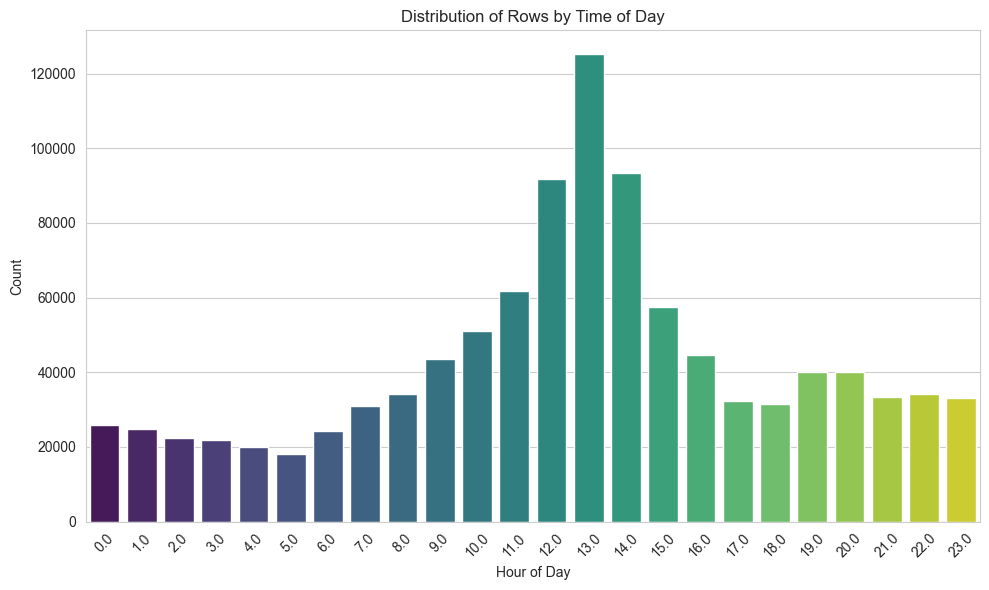

In [12]:
# time of day distribution
plt.figure(figsize=(10, 6))
# datetime column has DDMMYYYY HHmmSS format
df['time'] = pd.to_datetime(df['datetime'], format='%d%m%Y %H%M%S').dt.hour
# count the number of rows for each hour
time_counts = df['time'].value_counts().sort_index()
sns.barplot(x=time_counts.index, y=time_counts.values, palette='viridis')
plt.title('Distribution of Rows by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# night = 20-5, morning = 5-10, day = 10-16, evening = 16-20
def get_time_of_day(hour):
    if hour >= 20 or hour < 5:
        return 'Night'
    elif hour >= 5 and hour < 10:
        return 'Morning'
    elif hour >= 10 and hour < 16:
        return 'Day'
    else:
        return 'Evening'
# apply the function to the time column
df['time_of_day'] = df['time'].apply(get_time_of_day)

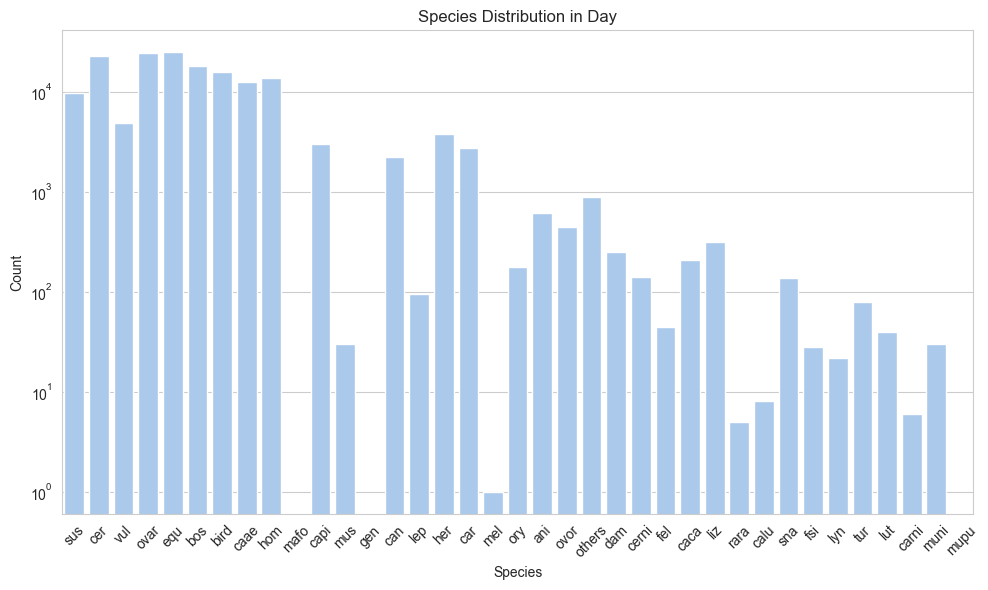

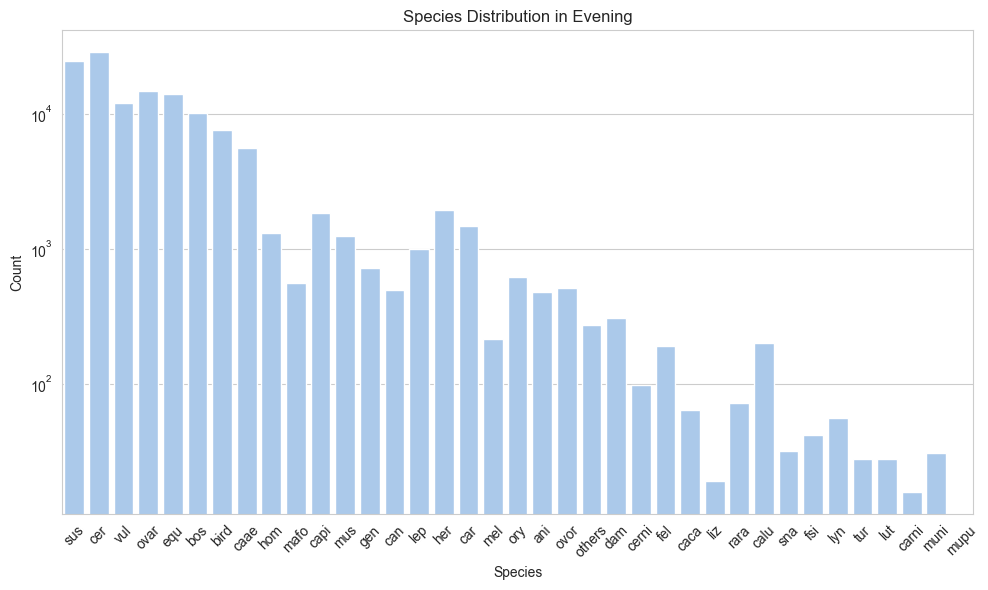

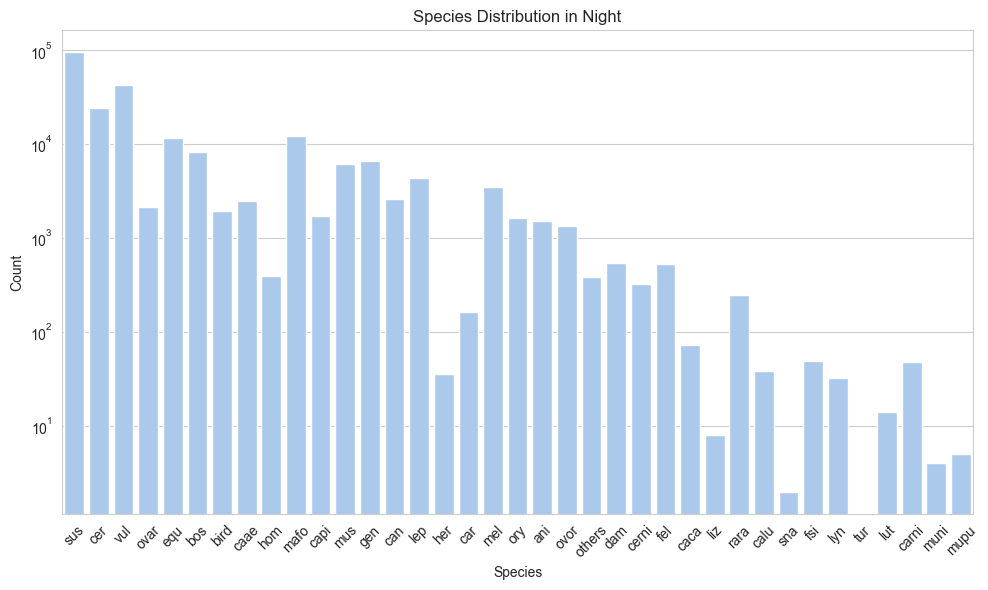

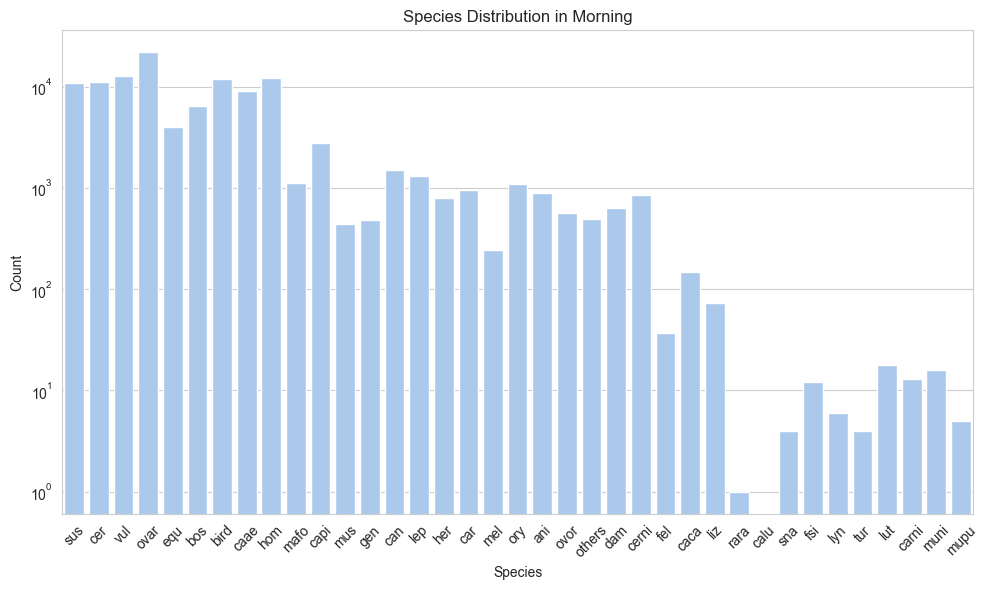

In [16]:
# distribution of species by time of day
def plot_species_distribution_by_time_of_day(df, time_of_day):
    #discard emp species
    df = df[df['species'] != 'emp']
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df[df['time_of_day'] == time_of_day], x='species', order=df['species'].value_counts().index)
    plt.title(f'Species Distribution in {time_of_day}')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
# List of time of day
time_of_day_list = df['time_of_day'].unique()
# Plot species distribution for each time of day
for time_of_day in time_of_day_list:
    plot_species_distribution_by_time_of_day(df, time_of_day)